In [3]:
using QuadGK
function D(n,x)
    integral, err = quadgk(theta -> sin(n*theta-x*sin(theta)), 0, pi, rtol=1e-8);
    integral
end;

LoadError: syntax: incomplete: premature end of input

In [12]:
D(-4,pi)

0.5286984265507203

In [1]:
# My first Julia program
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("LinearAlgebra")
using LinearAlgebra;

N         = 2000;
a         = 0;
b         = 50;
k         = 1;
# Column vector of integers from 0 to N
n         = 0:1:N;
nn        = 1:1:N-1;
# Chebyshev extrema grid
x         = -cos.(pi*n/N);
xsub      = x[2:N];
ysub      = (b-a)/2*xsub.+(a+b)/2;
T         = cos.(acos.(x)*n');
Tsub      = T[2:N,:];
sqx       = -((xsub.^2).-1);
Usub      = Diagonal(((sqx).^(-0.5)))*sin.(acos.(xsub)*n');
dTsub     = Usub * Diagonal(n);
dT        = [(-((-1).^n).*n.^2)'; dTsub; (n.^2)'];
D1        = dT/T;
# Second derivative of T(x) on extrema grid without endpoints
d2Tsubr   = Diagonal(xsub) * Usub - Tsub*Diagonal(n);
d2Tsub    = - Diagonal(((xsub.^2).-1).^(-1))*d2Tsubr*Diagonal(n);
# Second derivative of T(x) on extrema grid with endpoints
d2Top     = (((-1).^n).*(n.^2).*((n.^2).-1)/3)';
d2Tbot    = ((n.^2).*((n.^2).-1)/3)';
d2T       = [d2Top; d2Tsub; d2Tbot];
# Second-order differentiation matrix for extrema grid
D2        = D1*D1;
# Second-order differentiation matrix for extrema grid without endpoints
E1        = D1[2:N,2:N];
E2        = D2[2:N,2:N];
H         = -4/((b-a)^2) * E2 + k * Diagonal(ysub);
EIG       = eigen(H);
Y         = EIG.vectors;
Lam       = EIG.values;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


In [20]:
DD1=dT/T; DD2=DD1^2 ; E2=DD2[2:N,2:N]; H         = -4/((b-a)^2) * E2 + k * Diagonal(ysub);

In [21]:
EIG       = eigen(H);
Y         = EIG.vectors;
Lam       = EIG.values;

In [2]:
Y=Y[:,sortperm(Lam)];
Lam = sort(Lam);

In [3]:
Lam[1]

2.3381074104595507

 Resolving package versions...


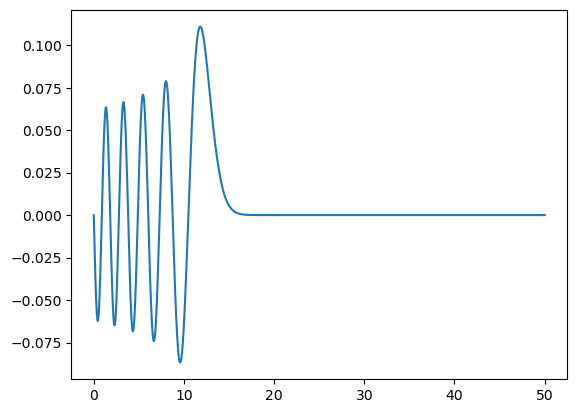

  Updating `/data/.julia-20190315/environments/v1.1/Project.toml`
 [no changes]
  Updating `/data/.julia-20190315/environments/v1.1/Manifest.toml`
 [no changes]


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6271637630>

In [5]:
Pkg.add("PyPlot")
using PyPlot
PyPlot.plot(ysub,Y[:,10])

In [39]:
EIG.values[660]

511.4851590475714

In [10]:
N         = 10000;
a         = 0;
b         = 50;
L         = 300;
k         = 1;
# Column vector of integers from 0 to N
n         = 0:1:N;
nn        = 1:1:N-1;
# Chebyshev extrema grid
t         = pi*(n/N.+1);
x         = cos.(t);

MethodError: MethodError: no method matching +(::Irrational{:π}, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(!Matched::PyCall.PyObject, ::Any) at /home/fusion809/.julia/packages/PyCall/ttONZ/src/pyoperators.jl:13
  +(::Real, !Matched::Complex{Bool}) at complex.jl:291
  ...

In [23]:
ysub      = L*((cot.(t./2)).^2);


In [ ]:
# My first Julia program
# Import package manager
using Pkg;

# Install and import ODE
Pkg.add("LinearAlgebra")
using LinearAlgebra;

N         = 10000;
a         = 0;
b         = 50;
L         = 300;
k         = 1;
# Column vector of integers from 0 to N
n         = 0:1:N;
nn        = 1:1:N-1;
# Chebyshev extrema grid
t         = pi*(n/N.+1);
x         = cos.(t);
xsub      = x[2:N];
y         = L*((cot.(t./2)).^2);
ysub      = y[2:N];
T         = cos.(acos.(x)*n');
Tsub      = T[2:N,:];
sqx       = -((xsub.^2).-1);
Usub      = Diagonal(((sqx).^(-0.5)))*sin.(acos.(xsub)*n');
dTsub     = Usub * Diagonal(n);
dT        = [(-((-1).^n).*n.^2)'; dTsub; (n.^2)'];
dT        = Diagonal(2*L./(((y.+L).^2)))*dT;
D1        = dT/T;
# Second derivative of T(x) on extrema grid without endpoints
d2Tsubr   = Diagonal(xsub) * Usub - Tsub*Diagonal(n);
d2Tsub    = - Diagonal(((xsub.^2).-1).^(-1))*d2Tsubr*Diagonal(n);
# Second derivative of T(x) on extrema grid with endpoints
d2Top     = (((-1).^n).*(n.^2).*((n.^2).-1)/3)';
d2Tbot    = ((n.^2).*((n.^2).-1)/3)';
d2T       = [d2Top; d2Tsub; d2Tbot];
# Second-order differentiation matrix for extrema grid
D2        = D1*D1;
# Second-order differentiation matrix for extrema grid without endpoints
E1        = D1[2:N,2:N];
E2        = D2[2:N,2:N];
H         = -E2 + k * Diagonal(ysub);
EIG       = eigen(H);
Y         = EIG.vectors;
Lam       = EIG.values;

 Resolving package versions...


In [ ]:
figure(1)
plot(ysub(1:3*N/5), Y(1:3*N/5,1));
figure(2)
plot(ysub(1:3*N/5), Y(1:3*N/5,2));
figure(3)
plot(ysub(1:3*N/5), Y(1:3*N/5,Nfrag))